## 心血管疾病数据探索分析



本次挑战中，您将回答有关心血管疾病（CVD）数据集的问题，并预测患者是否存在心血管疾病（CVD）风险。


### 初步数据分析


首先，导入挑战所需模块：

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")


本次挑战将优先选择 Seaborn 用于绘图，下面我们定义 Seaborn 全局绘图参数，保证后续图像更加整洁美观。
<br />
sns包含了所有的设置方法，如下：

    __all__ = ["set_theme", "set", "reset_defaults", "reset_orig",
           "axes_style", "set_style", "plotting_context", "set_context",
           "set_palette"]

每个方法的参数以及意义参考：
[Seaborn官网](http://seaborn.pydata.org)-->[API](http://seaborn.pydata.org/api.html)-->Themeing

In [10]:
sns.set()
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize":(11, 8),
        "axes.titlesize":18,
    }
)
rcParams["figure.figsize"] = 11, 8


读取预览

In [11]:
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/mlbootcamp5_train.csv', sep=';'
)
# sep=';'。表格中每一行存储中有`;`，因此用该语句将数据分割开
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


数据集特征表示如下：

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


接下来，我们探索数据值分布情况。这里使用`catplot()`绘制出变量特征的计数条形图。

In [12]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke', 'alco',
                                           'active', 'cardio'])
df_uniques
# 490000 rows × 2 columns  rows:7000*7 columns:(variable, value)

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
...,...,...
489995,cardio,0
489996,cardio,1
489997,cardio,1
489998,cardio,1


In [13]:
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count())\
    .sort_index(level=[0, 1])\
    .rename(columns={'value': 'count'})\
    .reset_index()      # 重新建立索引
# sort_index表示排序？？


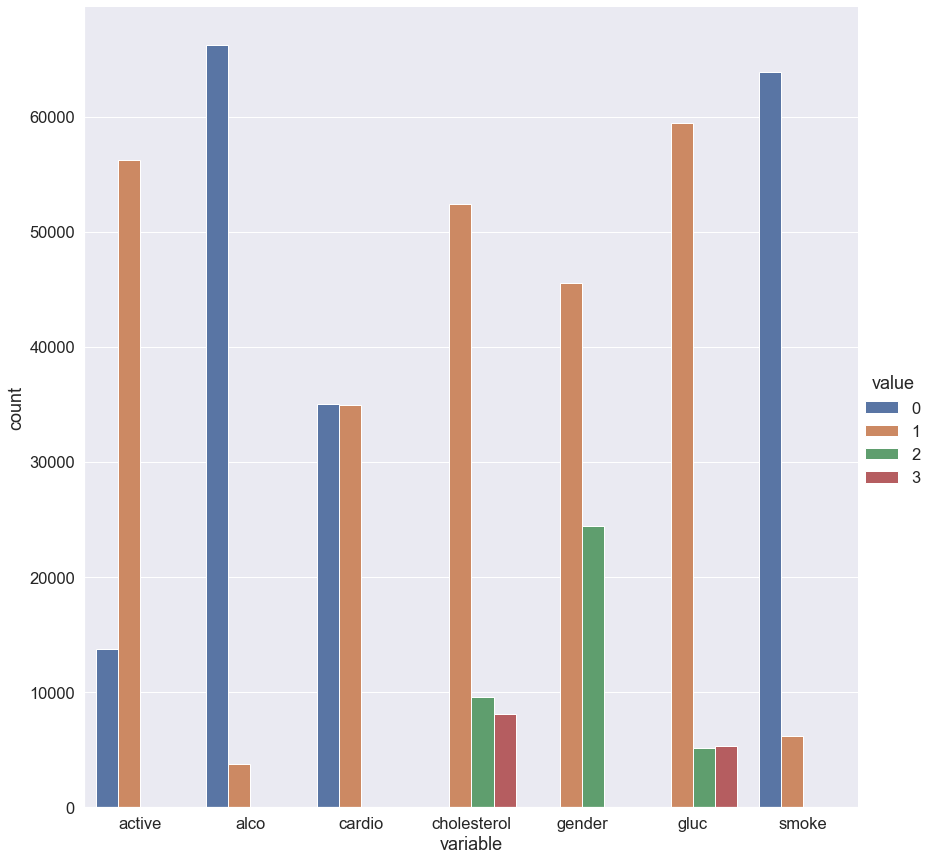

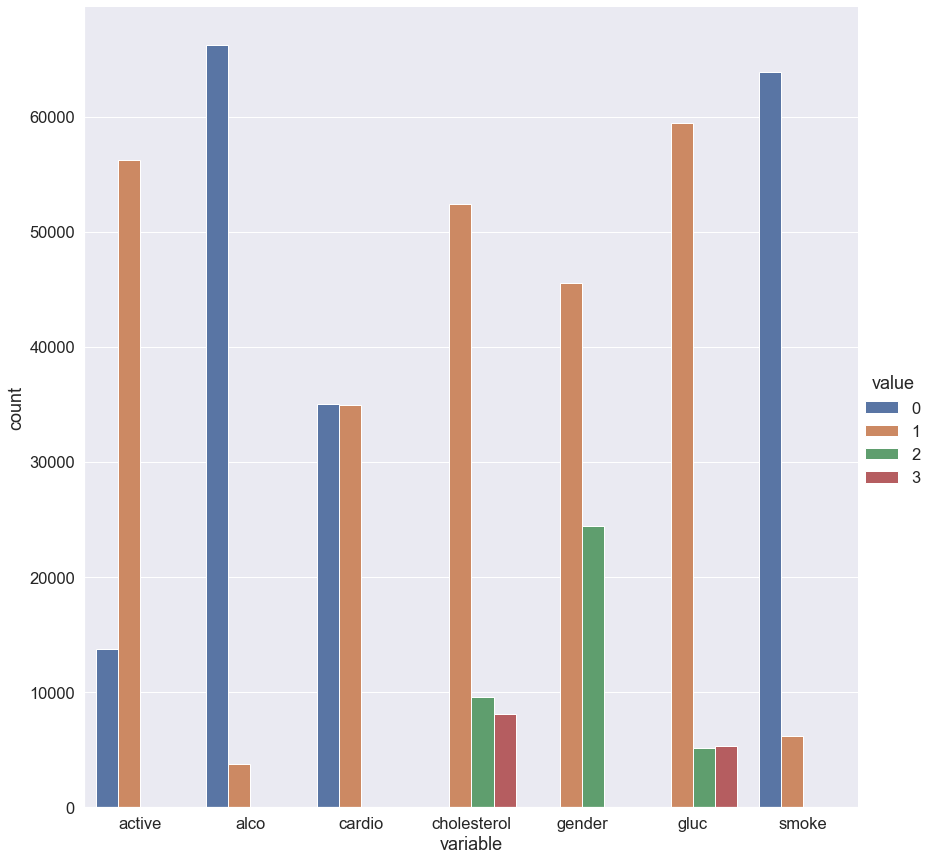

In [14]:
sns.catplot(x='variable', y='count', hue='value',
            data=df_uniques, kind='bar', height=12)


接下来，让我们按目标值分割数据集，这样往往可以通过绘图结果快速找出相对重要的特征。

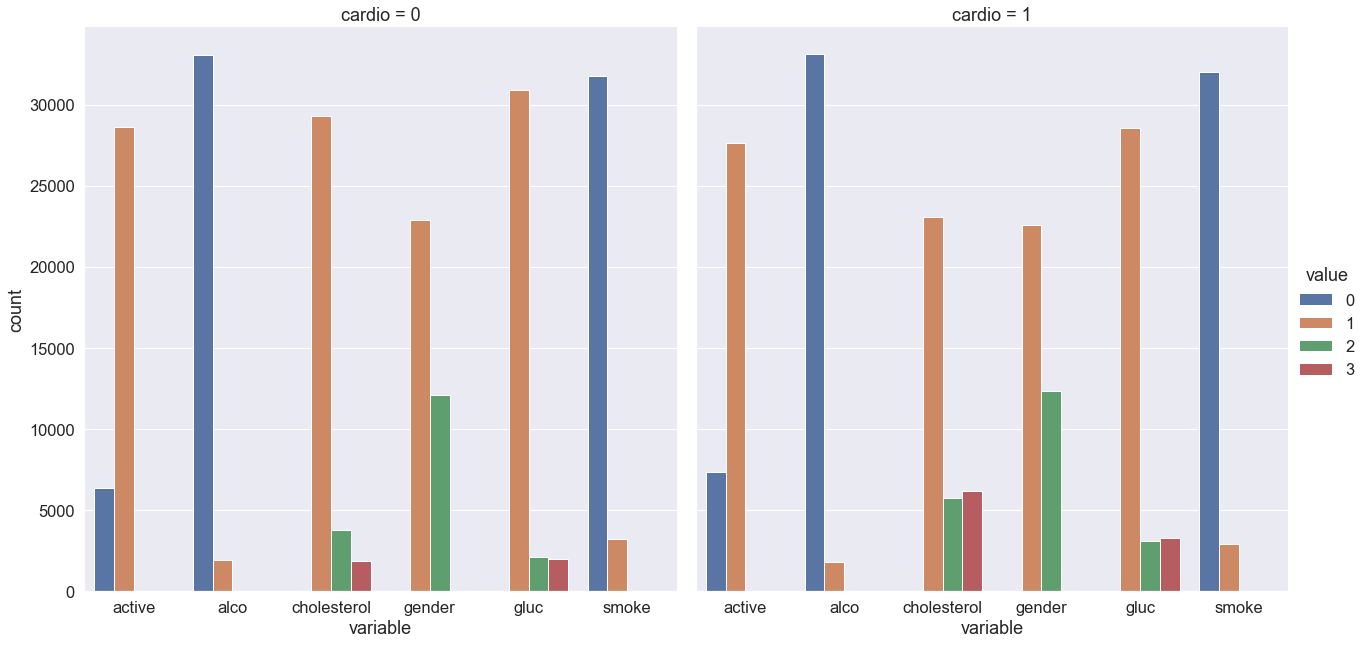

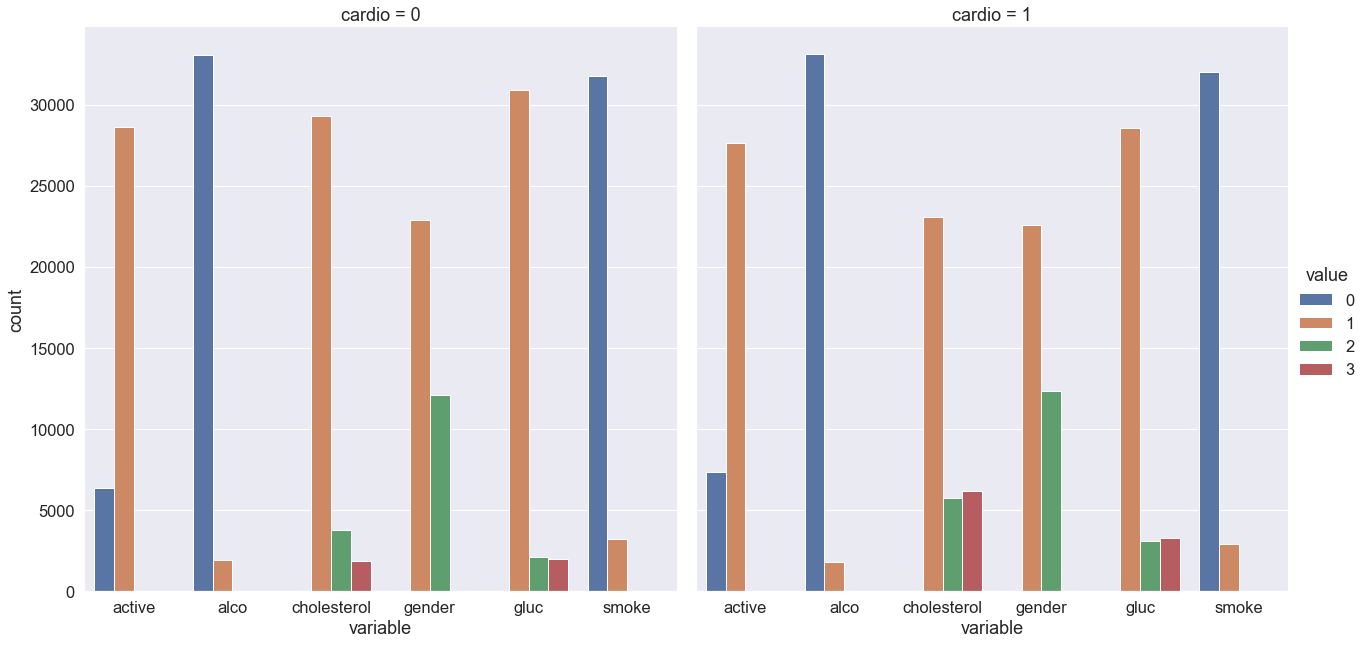

In [15]:
df_uniques = pd.melt(frame=df, value_vars=['gender', 'cholesterol',
                                           'gluc', 'smoke', 'alco',
                                           'active'], id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value',
                                              'cardio'])['value'].count())\
    .sort_index(level=[0, 1])\
    .rename(columns={'value': 'count'})\
    .reset_index()

sns.catplot(x='variable', y='count', hue='value',
            col='cardio', data=df_uniques, kind='bar', height=9)


您可以看到胆固醇和葡萄糖水平对目标变量影响明显较大。这是巧合吗？

接下来，你需要自行补充必要的代码来回答相应的挑战问题。


---

### 进一步观察

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中有多少男性和女性？
<br />由于 `gender` 特征没有说明男女，你需要通过分析身高计算得出。


- [ A ] 45530 女性 和 24470 男性
- [ B ] 45530 男性 和 24470 女性
- [ C ] 45470 女性 和 24530 男性
- [ D ] 45470 男性 和 24530 女性

In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [58]:
df_uniques_gender = pd.melt(df, value_vars=['height'], id_vars=["gender"])
df_uniques_gender

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
69995,2,height,168
69996,1,height,158
69997,2,height,183
69998,1,height,163


In [59]:
df_uniques_gender.groupby(["variable", "value", "gender"])["value"].count()

variable  value  gender
height    55     1         1
          57     1         1
          59     1         1
          60     1         1
          64     1         1
                          ..
          198    1         5
                 2         9
          200    2         1
          207    2         1
          250    1         1
Name: value, Length: 179, dtype: int64

In [60]:
df_uniques_gender = pd.DataFrame(df_uniques_gender.groupby(["variable", "value", "gender"])["value"].count())\
    .sort_index(level=[0, 1])\
    .rename(columns={"value":"count"})\
    .reset_index()
df_uniques_gender

,variable,value,gender,count
0,height,55,1,1
1,height,57,1,1
2,height,59,1,1
3,height,60,1,1
4,height,64,1,1
...,...,...,...,...
174,height,198,1,5
175,height,198,2,9
176,height,200,2,1
177,height,207,2,1


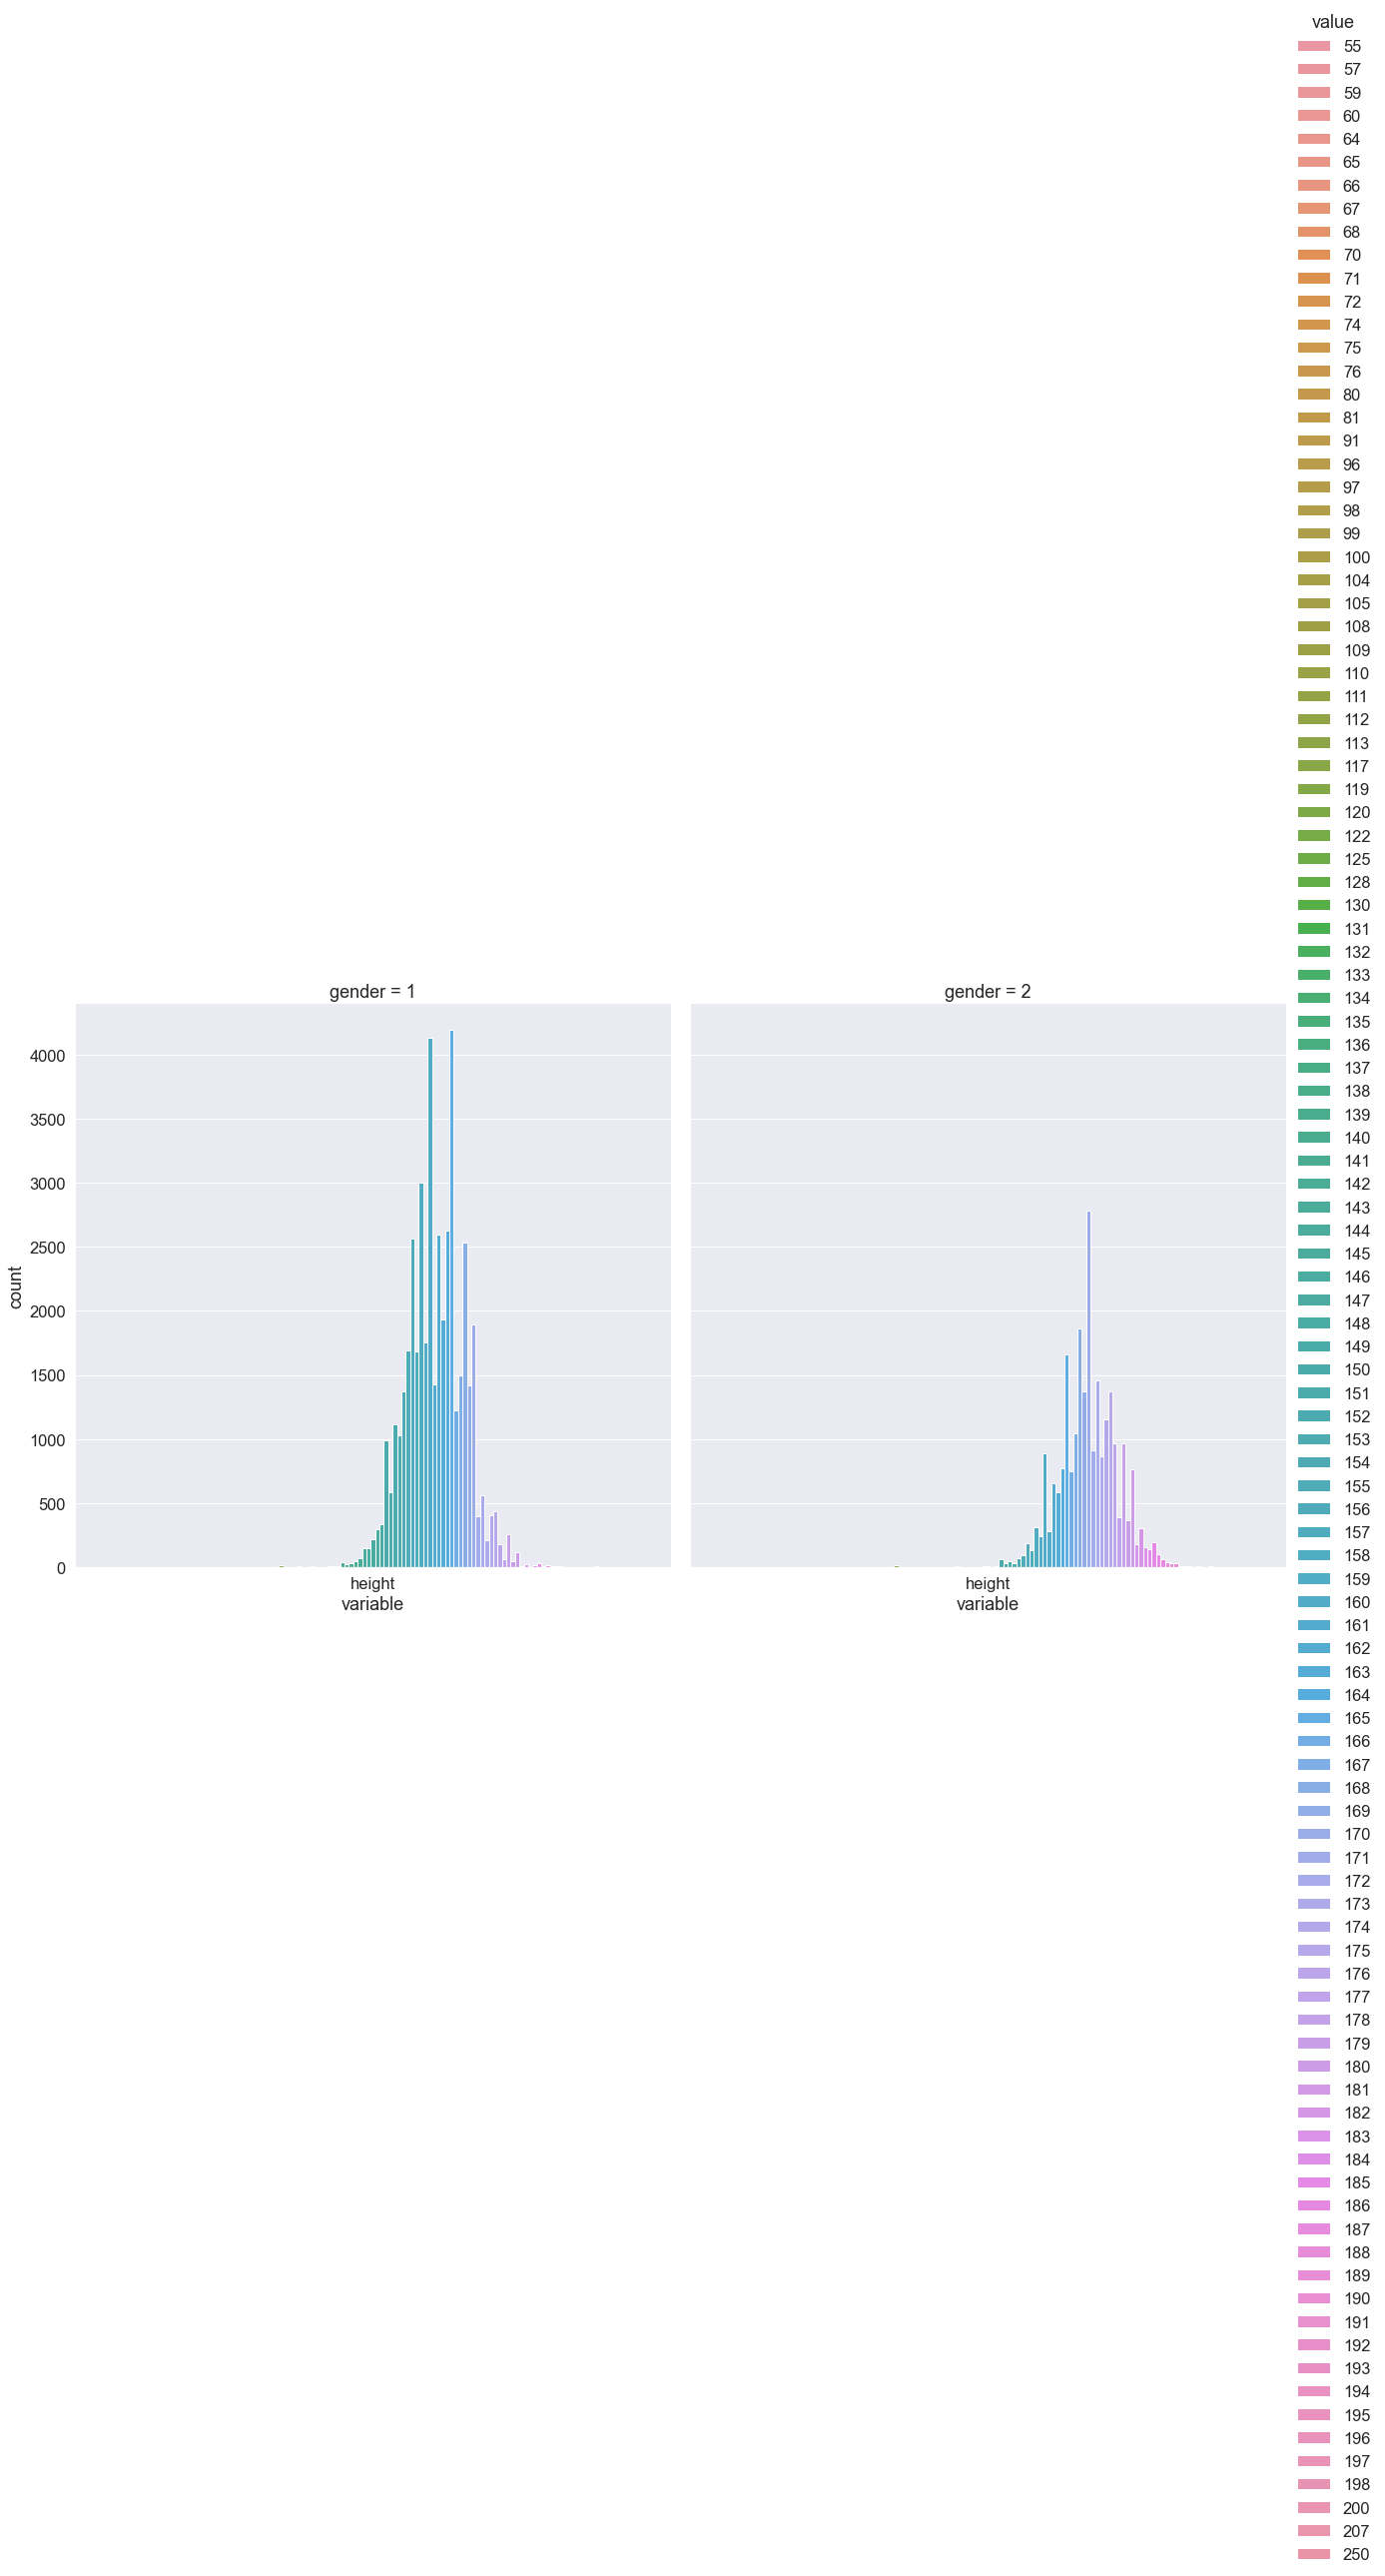

In [61]:
sns.catplot(x='variable', y='count', hue='value',
            col='gender', data=df_uniques_gender, kind='bar', height=9)

女性 45530
男性 24470


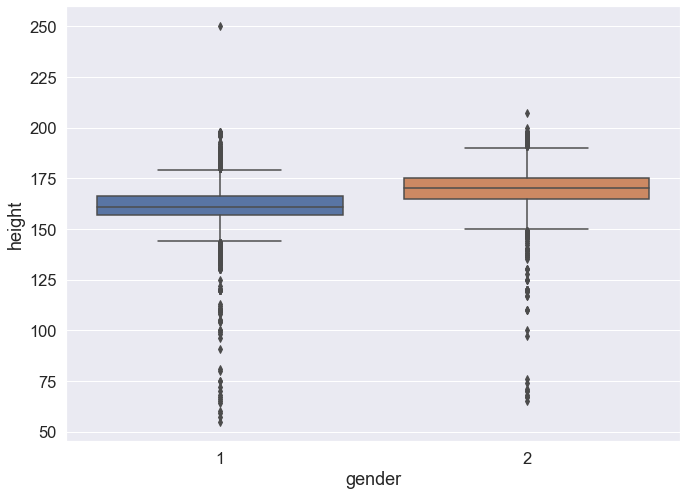

In [67]:
sns.boxplot(x="gender", y="height", data=df)
print("女性", df["gender"].value_counts().iloc[0])
print("男性",df["gender"].value_counts().iloc[1])

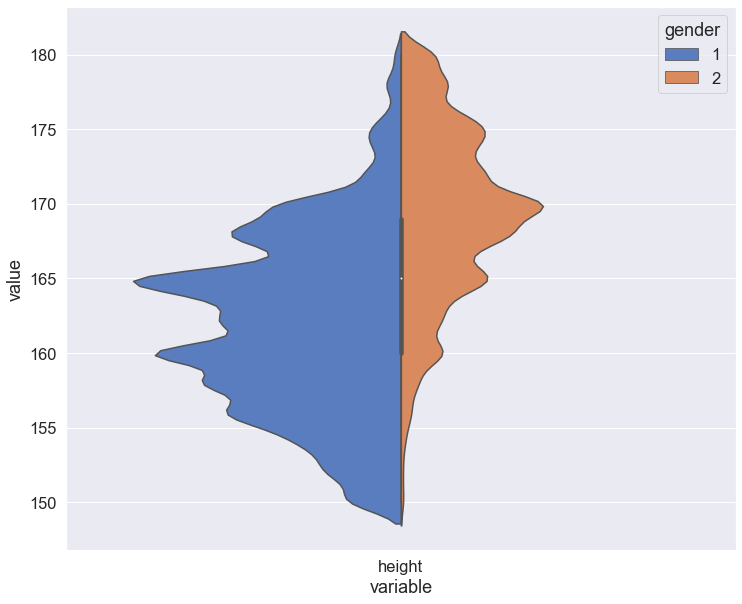

In [189]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable',
    y='value',
    hue='gender',
    palette="muted",
    split=True,
    data=df_melt,
    scale='count',
    scale_hue=False
)

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中男性和女性，哪个群体饮酒的频次更高？

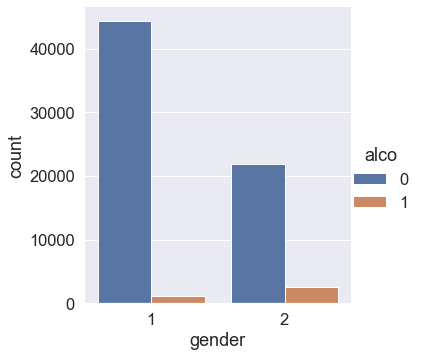

In [71]:
df_ = pd.DataFrame(df.groupby(["gender", "alco"])["alco"].count())\
    .sort_index(level=[0, 1])\
    .rename(columns={"alco":"count"})\
    .reset_index()
df_

In [85]:
sns.catplot(x="gender", y="count", hue="alco", data=df_, kind="bar")

ValueError: Could not interpret input 'alco'

<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中男性和女性吸烟者所占百分比的差值是多少？

In [83]:

df_ = pd.DataFrame(df.groupby(["gender", "smoke"])["gender"].count())\
    .rename(columns={"gender":"count"})\
    .reset_index()
df_

,gender,smoke,count
0,1,0,44717
1,1,1,813
2,2,0,19114
3,2,1,5356


In [84]:
a = df_[df_["gender"]==2]["count"].iloc[1]/(df_[df_["gender"]==2]["count"].iloc[0] + df_[df_["gender"]==2]["count"].iloc[1])-\
    df_[df_["gender"]==1]["count"].iloc[1]/(df_[df_["gender"]==1]["count"].iloc[0] + df_[df_["gender"]==1]["count"].iloc[1])
print(a*100)

20.102390309976737


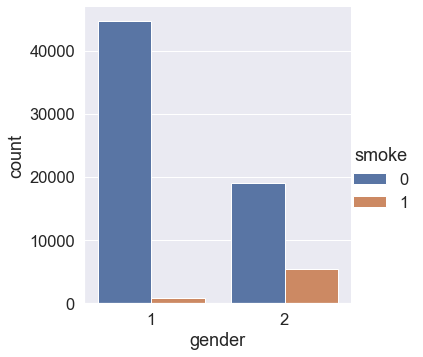

In [81]:
sns.catplot(x="gender", y="count", hue="smoke", data=df_, kind="bar")


<i class="fa fa-question-circle" aria-hidden="true"> 问题：</i>数据集中吸烟者和非吸烟者的年龄中位数之间的差值（以月计）近似是多少？你需要尝试确定出数据集中 `age` 合理的表示单位。


本次挑战规定 1 年为 365.25 天。

In [94]:
day = df[df["smoke"]==0]["age"].apply([np.median])-df[df["smoke"]==1]["age"].apply([np.median])

median    19.613963
Name: age, dtype: float64

In [96]:
day/365.25*12


median    19.613963
Name: age, dtype: float64

问题：计算 [60,65) 年龄区间下，较健康人群（胆固醇类别 1，收缩压低于 120）与高风险人群（胆固醇类别为 3，收缩压 [160,180)）各自心血管病患所占比例。并最终求得二者比例的近似倍数。


In [147]:
df['age_year'] = (df["age"]/365.25).round().astype("int")
df['age_year'].max()

65

In [148]:
# 选择60-65之间的人
df_ = df[(df["age_year"]>=60) & (df["age_year"]<65)& (df['gender'] == 2) & (df['smoke'] == 1)]
df_

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0,62
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,99961,22142,2,175,72.0,130,80,1,1,0,0,1,0,61
69979,99969,22423,1,163,74.0,160,100,2,2,0,0,1,1,61
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0,60
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62


In [149]:
# 选择较健康人群（胆固醇类别 1，收缩压低于 120）
df_1 = df_[df_["cholesterol"]==1 & (df_["ap_hi"]<120)]
v1 = df_1["cardio"].mean()
v1

0.3987682832948422

In [150]:
# 选择不健康人群（胆固醇类别 3，收缩压160-180）
df_2 = df_[df_["cholesterol"]==3 & (df_["ap_hi"]>=160) & (df_["ap_hi"]<180)]
v2 = df_2["cardio"].mean()
v_p = v2/v1
v_p

2.1311981494197236

???


[ A ] 数据集样本中 BMI 中位数在正常范围内。
[ B ] 女性的平均 BMI 指数高于男性。
[ C ] 健康人群的 BMI 平均高于患病人群。
[ D ] 健康和不饮酒男性中，BMI 比健康不饮酒女性更接近正常值。

In [151]:
# BMI计算公式如下
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
# 正常 BMI 指数一般在 18.5 到 25 之间。

In [152]:
df['BMI'].median()


26.374068120774975

- [x] [ A ] 数据集样本中 BMI 中位数在正常范围内。

In [153]:
df.groupby(["gender"])["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

- [v] [ B ] 女性的平均 BMI 指数高于男性。


In [154]:
df.groupby(["cardio"])["BMI"].mean()

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

- [x] [ C ] 健康人群的 BMI 平均高于患病人群。

In [180]:
df[(df["gender"]==2) & (df["cardio"]==0) & (df["alco"]==0)]["BMI"].mean()

25.87263807546017

In [181]:
df[(df["cardio"]==0) & (df["gender"]==1) & (df["alco"]==0)]["BMI"].mean()

26.845406594131507

In [184]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].mean().to_frame()

BMI
gender alco cardio           
1      0    0       26.845407
            1       29.052771
       1    0       28.671457
            1       30.812347
2      0    0       25.872638
            1       27.522450
       1    0       26.097220
            1       28.226569

血压特征中，舒张压高于收缩压的样本。
身高特征中，低于 2.5％ 分位数的样本。
身高特征中，高于 97.5％ 分位数的样本。
体重特征中，低于 2.5％ 分位数的样本。
体重特征中，高于 97.5％ 分位数的样本。

In [ ]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:
# 问题：清洗掉的数据占原数据总量的近似百分比？
1 - filtered_df.shape[0] / df.shape[0]


使用 heatmap() 绘制特征之间的皮尔逊相关性系数矩阵。

<AxesSubplot:>

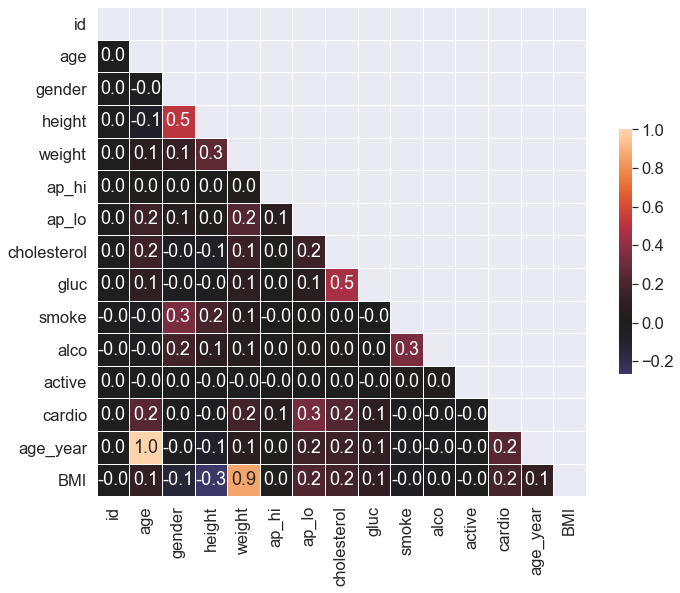

In [186]:
# 计算相关性系数矩阵
df = filtered_df.copy()

corr = df.corr(method='pearson')

# 创建一个 Mask 来隐藏相关矩阵的上三角形
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 绘制图像
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:xlabel='age_year', ylabel='count'>

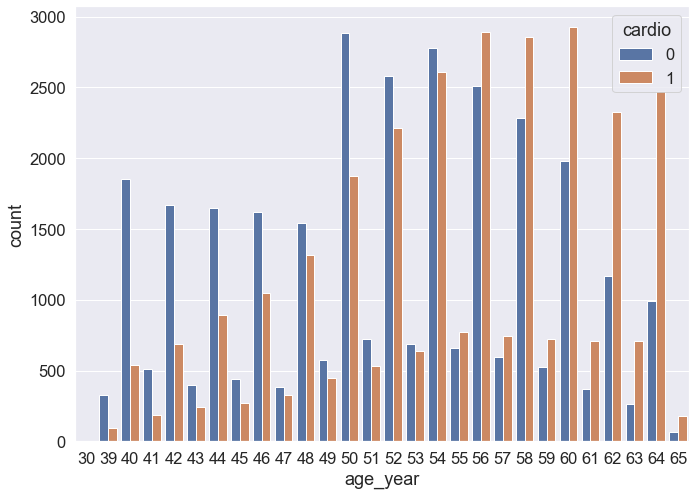

In [188]:
# 年龄可视化
sns.countplot(x="age_year", hue='cardio', data=df)